


 # Challenge 1: NLP - Tokenization





Challenge 1: Tokenization : You have a collection of tickets enclosed below. Apply tokenization using python nltk and generate a vocabulary of words in the ticket.  Share the link to the codebase (github link) in the comments section below. Google Colab can be used as an environment.



In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Loading necessary libraries
import pandas as pd
import nltk
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from collections import Counter 

In [3]:
# Reading the file
df = pd.read_csv("ticket_Data.csv")

In [4]:
df.head()
print("\n")
df.count()
print("\n")
df.dtypes
print("\n")
df.shape


,TicketId,Description
0,1,Job re-run
1,2,Job Re-Run
2,3,the job failed due to row count mismatch betwe...
3,4,Job got failed due to name pipe error. Then jo...
4,5,Job got failed due to duplicate issue. Then is...


TicketId       6445
Description    6445
dtype: int64

TicketId        int64
Description    object
dtype: object

(6445, 2)

In [5]:
# making the text lower case
df['Description']=df['Description'].str.lower()

# Tokenize
nltk.download('punkt')
df['tokens'] = df['Description'].apply(word_tokenize)
df.head()



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

,TicketId,Description,tokens
0,1,job re-run,"[job, re-run]"
1,2,job re-run,"[job, re-run]"
2,3,the job failed due to row count mismatch betwe...,"[the, job, failed, due, to, row, count, mismat..."
3,4,job got failed due to name pipe error. then jo...,"[job, got, failed, due, to, name, pipe, error,..."
4,5,job got failed due to duplicate issue. then is...,"[job, got, failed, due, to, duplicate, issue, ..."


In [6]:
# Making Taken column a list to enable further clean-up
tokens = list(df['tokens'])
tokens[0:2] # it is list of lists

[['job', 're-run'], ['job', 're-run']]

In [7]:
# making flat list from list of lists
tokens_list = [item for sublist in tokens for item in sublist]

#tokens_list = []
#for sublist in tokens:
#    for item in sublist:
#        flat_list.append(item)

tokens_list[0:3]
print(f"\nNumber of Tokens:{len(tokens_list)}")

['job', 're-run', 'job']


Number of Tokens:82446


In [8]:
# removing punctuations (non-alphabetic)
tokens_list_alpha = [''.join(char for char in word if char not in string.punctuation) for word in tokens_list]
tokens_list_alpha[0:3]
print(f"\nNumber of alpha Tokens without punctuations: {len(tokens_list_alpha)}")


['job', 'rerun', 'job']


Number of alpha Tokens without punctuations: 82446


In [9]:
# drop empty tokens
tokens_list_alpha = [word for word in tokens_list_alpha if word]
tokens_list_alpha[0:3]
print(f"\nNumber of alpha Tokens without punctuations after removing empty tokens:{len(tokens_list_alpha)}")

['job', 'rerun', 'job']


Number of alpha Tokens without punctuations after removing empty tokens:73803


In [10]:
# Removing stop words
nltk.download('stopwords')
stop_words = stopwords.words('english')
len(stop_words)
print("\n")

tokens_list_alpha_nostop = [words for words in tokens_list_alpha if not words in stop_words]
tokens_list_alpha_nostop[0:3]
print(f"\nNumber of alpha Tokens without stopwords, punctuations, empty tokens: {len(tokens_list_alpha_nostop)}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

179

['job', 'rerun', 'job']


Number of alpha Tokens without stopwords, punctuations, empty tokens: 47696


In [11]:
# Top 10 occuring tokens
high_freq = Counter(tokens_list_alpha_nostop).most_common(10)
print(f"Top 10 most occuring words are: {high_freq}")

Top 10 most occuring words are: [('job', 7087), ('issue', 3143), ('completed', 3069), ('successfully', 2551), ('due', 2242), ('rerun', 2022), ('failed', 1776), ('got', 1420), ('file', 1251), ('restarted', 1197)]


In [12]:
# adding "due", "got" in stop words list
stop_words = set(stopwords.words('english'))
#add words that aren't in the NLTK stopwords list
new_stopwords = ['due', 'got']
new_stopwords_list = stop_words.union(new_stopwords)

In [13]:
# Removing all stop words including new stop words and printing most occuring 10 tokens
tokens_list_alpha_customnostop = [words for words in tokens_list_alpha_nostop if not words in new_stopwords_list]
tokens_list_alpha_customnostop[0:3]
print(f"\nNumber of alpha Tokens without custom stopwords, punctuations, empty tokens: {len(tokens_list_alpha_customnostop)}")

# Top 10 occuring tokens after new stopwords removal
high_freq = Counter(tokens_list_alpha_customnostop).most_common(10)
print(f"Top 10 most occuring words are: {high_freq}")

['job', 'rerun', 'job']


Number of alpha Tokens without custom stopwords, punctuations, empty tokens: 44034
Top 10 most occuring words are: [('job', 7087), ('issue', 3143), ('completed', 3069), ('successfully', 2551), ('rerun', 2022), ('failed', 1776), ('file', 1251), ('restarted', 1197), ('source', 1045), ('fixed', 971)]


In [14]:
# Unique Tokens
unique_tokens = list(dict.fromkeys(tokens_list_alpha_customnostop))
unique_tokens[0:3]
print(f"\nNumber of Unique alpha Tokens without custom stopwords, punctuations, empty tokens: {len(unique_tokens)}")

['job', 'rerun', 'failed']


Number of Unique alpha Tokens without custom stopwords, punctuations, empty tokens: 821


In [15]:
Author = "Syed"
print(f"Thanks for spending time in going through the code.\n                                   Thanks & Regards, \n                                   {Author}")

Thanks for spending time in going through the code.
                                   Thanks & Regards, 
                                   Syed


# Challenge 2: FDIST, ngram 

Challenge 2 :  Tokenization, FDIST, ngrams This is an extension to the Challenge 1  .  Once you have tokenized, find the n-grams using FDIST function. FDIST and ngrams will give you the laundry list but has a lot of noise, hence the objective is to extract the key frequently occurring ngrams (where n>1 and n<=4) based on n=1 most frequently occurring terms. Assume that you need to be able to present to the Customer key issues found in the ticket database. Please feel free to explore the inclusion of STOPWORDS in this solution

In [16]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import random

In [17]:
df.head()
df.isnull().sum() # No nulls found

,TicketId,Description,tokens
0,1,job re-run,"[job, re-run]"
1,2,job re-run,"[job, re-run]"
2,3,the job failed due to row count mismatch betwe...,"[the, job, failed, due, to, row, count, mismat..."
3,4,job got failed due to name pipe error. then jo...,"[job, got, failed, due, to, name, pipe, error,..."
4,5,job got failed due to duplicate issue. then is...,"[job, got, failed, due, to, duplicate, issue, ..."


TicketId       0
Description    0
tokens         0
dtype: int64

In [18]:
# In order to find the key issues, the approach taken is to group the various issues into topics
# transforming description column using TfidfVectorizer with various ngram ranges to find the meaningful groupings
# Tried ngram ranges  2 & 3 and did not get meaningful results and hence choosing 4 
tfidf = TfidfVectorizer(max_df=0.95, min_df=0.01, ngram_range=(4,4), stop_words='english')
dtm = tfidf.fit_transform(df['Description'])
dtm

<6445x66 sparse matrix of type '<class 'numpy.float64'>'
	with 9464 stored elements in Compressed Sparse Row format>

In [19]:
# Using Non Negative Matrix Factorization to find 4 key topics 
nmf_model = NMF(n_components = 4, random_state = 43)
nmf_model.fit(dtm)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=4, random_state=43, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [20]:
# checking random 4 gram features generated by NMF
for i in range(10):
    random_word_id = random.randint(0, 10)
    print(tfidf.get_feature_names()[random_word_id])

error tbload released job
available job run completed
abended duplicate data issue
available job run completed
error tbload released job
error executed job completed
available job run file
completed running query manually
duplicate data issue issue
connectivity issue job started


In [21]:
# Printing the top 15 words in each topic so that Topic can be named accordingly
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['job run completed file', 'file available job run', 'source file available job', 'job got failed tdata', 'job restarted completed successfully', 'connectivity issue issue fixed', 'job executed completed successfully', 'running job got completed', 'issue job started completed', 'job got completed successfully', 'connectivity issue job started', 'failed connectivity issue job', 'job got failed connectivity', 'got failed connectivity issue', 'run job completed successfully']


THE TOP 15 WORDS FOR TOPIC #1
['unavailability issue fixed job', 'file unavailability issue fixed', 'failed file unavailability issue', 'duplicate issue issue fixed', 'got failed file unavailability', 'job got failed data', 'pipe error database connection', 'duplicate data issue issue', 'job abended duplicate data', 'abended duplicate data issue', 'data issue issue fixed', 'issue issue fixed job', 'fixed job restarted completed', 'issue fixed job restarted', 'job restarted completed su

In [22]:
# Naming the Topics based on the frequent 4 grams
failure_reason = {0: 'Connectivity Issue', 1: 'File Unavailability', 2: 'File/Job lock issue', 3: 'Duplicate Data Issue'}

print(f" Key issues found in the ticket database are: \n {failure_reason}")

 Key issues found in the ticket database are: 
 {0: 'Connectivity Issue', 1: 'File Unavailability', 2: 'File/Job lock issue', 3: 'Duplicate Data Issue'}


In [23]:
Author = "Syed"
print(f"Thanks for spending time in going through the code.\n                                   Thanks & Regards, \n                                   {Author}")

Thanks for spending time in going through the code.
                                   Thanks & Regards, 
                                   Syed


# Challenge 3: Document Similarity

Challenge 3 :  Assume the Customer has a collection of requirements that have been implemented in the past.  Customer is looking for a mechanism to identify if the new incoming requirement is a match to one of the implemented ones. The challenge is Customers organization spends quite a bit of time understanding if they have done it before. In the bigger picture Customer wants to leverage the learning of the past before implementing a similar requirement. Enclosed is a sample set of requirements, come up with an approach to identify the match against the incoming requirement, you need to select an appropriate measure to reflect the match percentage. You must include STOPWORDS in this solution.

In [53]:
# Downloading spaCy's large english library to convert the document is vectors for comparison/similarity

! python -m spacy download en_core_web_lg
! python -m spacy link en_core_web_lg en --force

     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=edfb7c381b7b076a8fa44fc8368e07bee9f4451ee5adee893f069109e54b3c3c
  Stored in directory: /tmp/pip-ephem-wheel-cache-8_val589/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_lg -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [54]:
# Import spaCy and load the language library
import spacy
nlp_lg = spacy.load('en')

In [55]:
# Reading the file as DF and using encoding='cp1252' as utf-8 is failing
df_req = pd.read_csv ("Input_RFP - Requirements.csv", encoding='cp1252')
df_req.head()

,SNO,ReqID,Requirement
0,1,FR1.07,The System will apply business rules to facili...
1,2,FR1.08,The System will establish unique date-specific...
2,3,FR1.09,The System will provide the flexibility to enr...
3,4,FR1.10,The System will maintain a record of benefit a...
4,5,FR1.100,The Solution shall provide details on the Web ...


In [56]:
# Incoming New Requirement
# The second requirement is a mixture of text from two requirements - FR1.09 and FR1.100 and the requirement is expected to match 1.100
#new_req = str(u"support proper processing of claims for dually eligible")
new_req = str(u"Enroll Members in Grievance Web portal")

In [57]:
# Comparing the new requirement with the list of eligible requirements to find the cosine similarity score
# Store the similairy of each existing document in a list sim_score
sim_score = []
for i in range(len(df_req)):
  sim_score.append(nlp_lg(new_req).similarity(nlp_lg(df_req['Requirement'][i])))
  #print ("\n")

In [29]:
print(f"Similarity scores of the new requirement against existing requirements are: \n {sim_score}")

Similarity scores of the new requirement against existing requirements are: 
 [0.6466395888733631, 0.5432802281706867, 0.5151648550292433, 0.5240956811064116, 0.5378821428748362, 0.3634064121693343, 0.7083804519914707, 0.5870037913222682, 0.7223291962478694, 0.6124532767083735]


In [58]:
# Identifying the max similarity score, its index position, correspoding requirement and complete requirements text

# Finding Max value and Index
max_value = max(sim_score)
max_index = sim_score.index(max_value)

# Printing the Results
print (f"The Index in which Max similarity score exists is: {max_index} and the score is: {max_value}")
print (f"\n The New document is matching upto {max_value.round(3)*100}% with Requirement ID {df_req.iloc[max_index,1]}")
#print (df_req[df_req.index.values==max_index])
print (f"\n The complete requirement of {df_req.iloc[max_index,1]} is given below: \n {df_req.iloc[max_index,2]}")

The Index in which Max similarity score exists is: 4 and the score is: 0.7934630317865315

 The New document is matching upto 79.3% with Requirement ID FR1.100

 The complete requirement of FR1.100 is given below: 
 The Solution shall provide details on the Web portal on how to file a grievance


In [59]:
print(f"Thanks for spending time in going through the code.\n                                   Thanks & Regards, \n                                   {Author}")

Thanks for spending time in going through the code.
                                   Thanks & Regards, 
                                   Syed


# Challenge 4: Word Cloud generation

Challenge 4 :  You have access to a html file called leaderTalk.html which has leaders talk about different dimensions both personal and official, including why they think Cognizant is their favorite organization. The objective is to parse the content related to why they think Cognizant is their favorite organization and generate word cloud that outlines their perspective.

 

Share the link to the python codebase (github link) in the comments section below along with the word cloud. Google Colab can be used as an environment.

In [32]:
# Importing necessaer libraries
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image # for custom shape word cloud
import numpy as np


In [33]:
# Reading the html file
soup = BeautifulSoup(open("leaderTalk.html", 'r'))

# # kill all script and style elements
# for script in soup(["script", "style"]):
#     script.extract()    # rip it out

# # get text
# text = soup.get_text()

# # break into lines and remove leading and trailing space on each
# lines = (line.strip() for line in text.splitlines())
# # break multi-headlines into a line each
# chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
# # drop blank lines
# text = '\n'.join(chunk for chunk in chunks if chunk)

In [34]:
question = 'what is your favorite thing about cognizant?'

In [35]:
comments = ''
for summary in soup.findAll('table'):
    for tr in summary.find_all('tr'):
        sel_ques_flag = False
        for td in tr.find_all('td'):
            if sel_ques_flag:
                comments += td.find('p').text.lower().strip()
            if td.find('p').text.lower().strip() == question:
                sel_ques_flag = True

comments

'entrepreneural culture and focus on doing the right thing by the customercelebrating work and can do attitudepassion to challenge status quo and help customer think about possibilities of the\n                                                            future1. we are a very ethical company, always try to do the right thing, treat people\n                                                            well and create the proper support system. the true testament is that my daughter\n                                                            joined working here in cognizant and i wouldn’t let her join a company that i didn’t\n                                                            feel good about.\n                                                            2. very entrepreneurial culture, you get as much of a chance to advance yourself\n                                                            as you’re capable of moving forward. i run my role as if it was my own company.if we are 

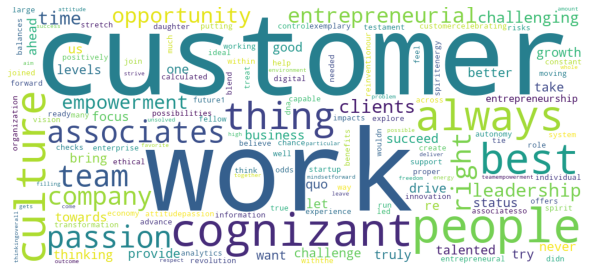

In [36]:
wordcloud = WordCloud(width = 1000, height = 450, 
                background_color ='white', stopwords=STOPWORDS, collocations = True,
                min_font_size = 10).generate(comments)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show(); 

In [37]:
# Uploading Shape for word cloud
mask = np.array(Image.open('upvote.png'))

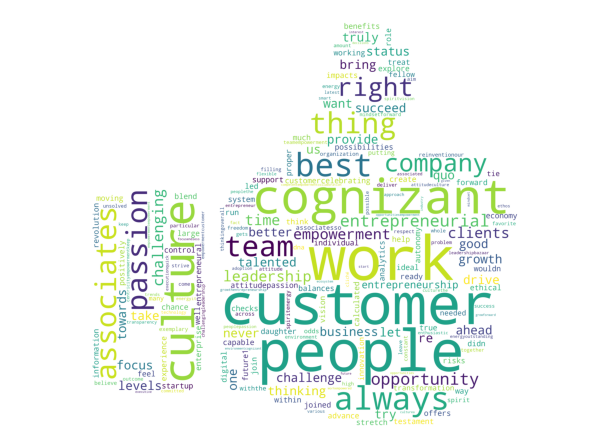

In [38]:
# Word Cloud by avoiding more than 1 tokens - to avoid duplicates
# Custom shape cloud
wordcloud = WordCloud(width = 1000, height = 450, mask=mask,
                background_color ='white', stopwords=STOPWORDS, collocations = False,
                min_font_size = 10).generate(comments)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show();

In [39]:
print(f"Thanks for spending time in going through the code.\n                                   Thanks & Regards, \n                                   {Author}")

Thanks for spending time in going through the code.
                                   Thanks & Regards, 
                                   Syed


# Challenge 5: Feature Extraction & Labeling

Challenge 5 :  This is an extension to the Challenge 2  .  Assume you are looking to build a model to predict if the text you are seeing is an issue or informational message. For e.g. job completed is an informational message whereas job abended is an issue.  The objective is to predict the issue. 

 

The task is multi fold

Generate the label for each data point to see if its informational or an issue
Build a count based matrix for each issue which reflects the number of occurrence of each word in the text along with the label
You can choose to restrict to a certain number of words based on your analysis
You can choose to remove the STOPWORDS from each text 
The count based matrix that you build for the entire data set should be in a format such that it can be given as an input to any of the algorithm for training and testing.

In [40]:
# RUN THIS CELL to perform standard imports:
import spacy
import pandas as pd
nlp = spacy.load('en_core_web_sm')
#from spacy import displacy
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
# Creating dataframe from Ticket data
df = pd.read_csv("ticket_Data.csv")
df.head()

,TicketId,Description
0,1,Job re-run
1,2,Job Re-Run
2,3,the job failed due to row count mismatch betwe...
3,4,Job got failed due to name pipe error. Then jo...
4,5,Job got failed due to duplicate issue. Then is...


In [42]:
# Applying spaCy's nlp library to every description find Parts of speech and store it in dataframe
doc = []

for i in range (len(df)):
  doc.append(nlp (df['Description'][i]))

print(doc[0:5])
df['nlp_desc'] = doc
df.head()

[Job re-run, Job Re-Run, the job failed due to row count mismatch between source file and the ODS table. We have requested the source team to place the source files again. The job completed after placing the source file in the source path., Job got failed due to name pipe error. Then job was re-started and completed successfully., Job got failed due to duplicate issue. Then issue was fixed and job was re-started once the issue fixed.]


,TicketId,Description,nlp_desc
0,1,Job re-run,"(Job, re, -, run)"
1,2,Job Re-Run,"(Job, Re, -, Run)"
2,3,the job failed due to row count mismatch betwe...,"(the, job, failed, due, to, row, count, mismat..."
3,4,Job got failed due to name pipe error. Then jo...,"(Job, got, failed, due, to, name, pipe, error,..."
4,5,Job got failed due to duplicate issue. Then is...,"(Job, got, failed, due, to, duplicate, issue, ..."


In [43]:
# Finding Part of speech count of every description and store it as dictionary
pos_count = []
for row in df['nlp_desc']:
  pos_count.append(row.count_by(spacy.attrs.POS))

print(pos_count[0:3])
df['pos_count'] = pos_count
df.head()

[{96: 1, 92: 3}, {96: 3, 97: 1}, {90: 7, 92: 15, 100: 6, 85: 5, 89: 1, 96: 1, 97: 3, 95: 1, 87: 1, 94: 1, 86: 1}]


,TicketId,Description,nlp_desc,pos_count
0,1,Job re-run,"(Job, re, -, run)","{96: 1, 92: 3}"
1,2,Job Re-Run,"(Job, Re, -, Run)","{96: 3, 97: 1}"
2,3,the job failed due to row count mismatch betwe...,"(the, job, failed, due, to, row, count, mismat...","{90: 7, 92: 15, 100: 6, 85: 5, 89: 1, 96: 1, 9..."
3,4,Job got failed due to name pipe error. Then jo...,"(Job, got, failed, due, to, name, pipe, error,...","{96: 1, 100: 7, 85: 2, 92: 3, 97: 2, 86: 2, 87..."
4,5,Job got failed due to duplicate issue. Then is...,"(Job, got, failed, due, to, duplicate, issue, ...","{96: 1, 100: 7, 85: 2, 84: 1, 92: 4, 97: 2, 86..."


In [44]:
# Generating Labels -- Issue & Information based on POS_COUNT
# If the sentence has more than 5 words and more than 2 verbs in it -- then it is most likely an issue
label = []
i=0
for dic in df['pos_count']:
  for k, v in dic.items():
    if (k==100 and v>=2 and len(dic.items())>5):
      label.append(df.index[i])
  i=i+1

# Updating Label against corresponding rows in dataframe
df['label'] = 'Information'
for i in label:
  df['label'][df.index==i] = 'Issue'

df.head()
df['label'].groupby(df['label']).count() #Count of issue vs Information records

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,TicketId,Description,nlp_desc,pos_count,label
0,1,Job re-run,"(Job, re, -, run)","{96: 1, 92: 3}",Information
1,2,Job Re-Run,"(Job, Re, -, Run)","{96: 3, 97: 1}",Information
2,3,the job failed due to row count mismatch betwe...,"(the, job, failed, due, to, row, count, mismat...","{90: 7, 92: 15, 100: 6, 85: 5, 89: 1, 96: 1, 9...",Issue
3,4,Job got failed due to name pipe error. Then jo...,"(Job, got, failed, due, to, name, pipe, error,...","{96: 1, 100: 7, 85: 2, 92: 3, 97: 2, 86: 2, 87...",Issue
4,5,Job got failed due to duplicate issue. Then is...,"(Job, got, failed, due, to, duplicate, issue, ...","{96: 1, 100: 7, 85: 2, 84: 1, 92: 4, 97: 2, 86...",Issue


label
Information    2213
Issue          4232
Name: label, dtype: int64

In [45]:
# Finding lemmatized text from nlp_desc and updating it as a string back to dataframe
desc = ''
lem=[]
for row in df['nlp_desc']:
  for token in row:
    desc = desc + ' ' + str(token.lemma_)
  lem.append(desc)
  desc= '' 

df['lem_desc'] = lem
df.head() 

,TicketId,Description,nlp_desc,pos_count,label,lem_desc
0,1,Job re-run,"(Job, re, -, run)","{96: 1, 92: 3}",Information,Job re - run
1,2,Job Re-Run,"(Job, Re, -, Run)","{96: 3, 97: 1}",Information,Job Re - Run
2,3,the job failed due to row count mismatch betwe...,"(the, job, failed, due, to, row, count, mismat...","{90: 7, 92: 15, 100: 6, 85: 5, 89: 1, 96: 1, 9...",Issue,the job fail due to row count mismatch betwee...
3,4,Job got failed due to name pipe error. Then jo...,"(Job, got, failed, due, to, name, pipe, error,...","{96: 1, 100: 7, 85: 2, 92: 3, 97: 2, 86: 2, 87...",Issue,Job get fail due to name pipe error . then jo...
4,5,Job got failed due to duplicate issue. Then is...,"(Job, got, failed, due, to, duplicate, issue, ...","{96: 1, 100: 7, 85: 2, 84: 1, 92: 4, 97: 2, 86...",Issue,Job get fail due to duplicate issue . then is...


In [46]:
# Initiating Count Vectorizer and finding keywords from lemmatized description
# creating document term Matrix (dtm)
cv = CountVectorizer(max_df=0.95, min_df=5, stop_words='english')
dtm = cv.fit_transform(df['lem_desc'])

In [47]:
# Examining the Key features/words identified by count vectorizer
nlp(str(cv.get_feature_names()[0:15]))
print("\n")
dtm
print("\n")
dtm.A.shape
print("\n")
dtm.A

['abende', 'abort', 'access', 'action', 'active', 'address', 'admin', 'alert', 'ans', 'area', 'arrival', 'arrive', 'audit', 'avaialble', 'availability']

<6445x237 sparse matrix of type '<class 'numpy.int64'>'
	with 39114 stored elements in Compressed Sparse Row format>

(6445, 237)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [48]:
# Making dtm as a dataframe
df_dtm =  pd.DataFrame(dtm.A, columns=cv.get_feature_names())
df_dtm.head()

# Viewing dtm with all the features
print(pd.DataFrame(dtm.A, columns=cv.get_feature_names()).head().to_string())

,abende,abort,access,action,active,address,admin,alert,ans,area,arrival,arrive,audit,avaialble,availability,available,avoid,backend,backlog,base,batch,bee,box,brj,bw,cancel,change,character,clear,close,closure,collect,compelte,complete,completion,confirm,connecitivity,connection,connectivity,connectivty,...,successful,successfull,successfulll,successfully,sucecssfully,sucessfully,support,table,target,tbload,td,tdata,team,time,timeout,tns,today,tods,tool,transfer,trigerre,trigger,unavailability,unavailable,unavailaibilty,unlinked,update,upgrade,use,user,validation,value,values,volume,warning,warranty,wass,weekend,wnash,wrongly
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


   abende  abort  access  action  active  address  admin  alert  ans  area  arrival  arrive  audit  avaialble  availability  available  avoid  backend  backlog  base  batch  bee  box  brj  bw  cancel  change  character  clear  close  closure  collect  compelte  complete  completion  confirm  connecitivity  connection  connectivity  connectivty  console  contact  continue  copy  correct  correctly  count  cover  crm  customer  data  database  datafix  date  datum  day  db  dba  dead  deadline  delay  delete  dependent  dev  development  didnt  disable  duplicate  duplicates  ems  end  entry  environment  error  event  execute  execution  extraction  fail  failure  falie  field  file  fix  fixe  format  free  ftp  hadoop  hang  happen  help  hold  hr  hub  huge  incident  incorrect  incorrectly  increase  inform  informed  insert  instance  invalid  issue  issuee  issues  job  kill  late  later  lead  level  liaise  liase  link  listener  load  lock  locked  log  login  long  low  manaul

In [49]:
# Merging with existing dataframe to derive the final dataframe that can be used for ML models as inputs.
df_dtm_cv = pd.merge(df, df_dtm, left_on=df.index, right_on=df_dtm.index)
df_dtm_cv.head()
len(df_dtm_cv)
df_dtm_cv.to_csv("df_dtm_cv.csv") # exporting as csv

,key_0,TicketId,Description,nlp_desc,pos_count,label,lem_desc,abende,abort,access,action,active,address,admin,alert,ans,area,arrival,arrive,audit,avaialble,availability,available,avoid,backend,backlog,base,batch,bee,box,brj,bw,cancel,change,character,clear,close,closure,collect,compelte,...,successful,successfull,successfulll,successfully,sucecssfully,sucessfully,support,table,target,tbload,td,tdata,team,time,timeout,tns,today,tods,tool,transfer,trigerre,trigger,unavailability,unavailable,unavailaibilty,unlinked,update,upgrade,use,user,validation,value,values,volume,warning,warranty,wass,weekend,wnash,wrongly
0,0,1,Job re-run,"(Job, re, -, run)","{96: 1, 92: 3}",Information,Job re - run,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,Job Re-Run,"(Job, Re, -, Run)","{96: 3, 97: 1}",Information,Job Re - Run,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,3,the job failed due to row count mismatch betwe...,"(the, job, failed, due, to, row, count, mismat...","{90: 7, 92: 15, 100: 6, 85: 5, 89: 1, 96: 1, 9...",Issue,the job fail due to row count mismatch betwee...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,4,Job got failed due to name pipe error. Then jo...,"(Job, got, failed, due, to, name, pipe, error,...","{96: 1, 100: 7, 85: 2, 92: 3, 97: 2, 86: 2, 87...",Issue,Job get fail due to name pipe error . then jo...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,5,Job got failed due to duplicate issue. Then is...,"(Job, got, failed, due, to, duplicate, issue, ...","{96: 1, 100: 7, 85: 2, 84: 1, 92: 4, 97: 2, 86...",Issue,Job get fail due to duplicate issue . then is...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


6445

In [50]:
print(f"Thanks for spending time in going through the code.\n                                   Thanks & Regards, \n                                   {Author}")

Thanks for spending time in going through the code.
                                   Thanks & Regards, 
                                   Syed


# Challenge 6: CV and TFIDF based Models for Prediction

Challenge 6 :  This is an extension to the Challenge 5 .  Assume you are looking to build a model to predict if the text you are seeing is an issue or informational message. For e.g. job completed is an informational message whereas job abended is an issue.  The objective is to predict the issue.

 

Build a TF-IDF based matrix along with the label
Explore giving that input into a logistic regression to predict if the given text is an issue
 

Do you see an improvement over Challenge 5 implementation?

In [141]:
# Performing standard import
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.pipeline import Pipeline

In [142]:
# Using the document term matrix created in Challenge 5
df_dtm_cv.head(2)

,key_0,TicketId,Description,nlp_desc,pos_count,label,lem_desc,abende,abort,access,action,active,address,admin,alert,ans,area,arrival,arrive,audit,avaialble,availability,available,avoid,backend,backlog,base,batch,bee,box,brj,bw,cancel,change,character,clear,close,closure,collect,compelte,...,successful,successfull,successfulll,successfully,sucecssfully,sucessfully,support,table,target,tbload,td,tdata,team,time,timeout,tns,today,tods,tool,transfer,trigerre,trigger,unavailability,unavailable,unavailaibilty,unlinked,update,upgrade,use,user,validation,value,values,volume,warning,warranty,wass,weekend,wnash,wrongly
0,0,1,Job re-run,"(Job, re, -, run)","{96: 1, 92: 3}",Information,Job re - run,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,Job Re-Run,"(Job, Re, -, Run)","{96: 3, 97: 1}",Information,Job Re - Run,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [143]:
# Extracting the dtm numeric columns for training
X = df_dtm_cv.iloc[: , 7:]
y = df_dtm_cv['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)

In [146]:
# Initializing, fitting and predicting with NaiveBayes' model and reporting metrics
nb = MultinomialNB()
nb.fit(X_train, y_train)
pred_nb = nb.predict(X_test)

print("\n")
print(metrics.accuracy_score(y_test,pred_nb))
print("\n")
print(metrics.confusion_matrix(y_test,pred_nb))
print("\n")
print(metrics.classification_report(y_test,pred_nb))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)



0.8308766485647789


[[296 164]
 [ 54 775]]


              precision    recall  f1-score   support

 Information       0.85      0.64      0.73       460
       Issue       0.83      0.93      0.88       829

    accuracy                           0.83      1289
   macro avg       0.84      0.79      0.80      1289
weighted avg       0.83      0.83      0.82      1289



In [147]:
# Initializing, fitting and predicting with Linear SVC model and reporting metrics
svc = LinearSVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

print("\n")
print(metrics.accuracy_score(y_test,pred_svc))
print("\n")
print(metrics.confusion_matrix(y_test,pred_svc))
print("\n")
print(metrics.classification_report(y_test,pred_svc))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)



0.9379363847944143


[[402  58]
 [ 22 807]]


              precision    recall  f1-score   support

 Information       0.95      0.87      0.91       460
       Issue       0.93      0.97      0.95       829

    accuracy                           0.94      1289
   macro avg       0.94      0.92      0.93      1289
weighted avg       0.94      0.94      0.94      1289



In [149]:
# Using the dataframe from Challenge 5 before adding dtm columns
df.head(2)

,TicketId,Description,nlp_desc,pos_count,label,lem_desc
0,1,Job re-run,"(Job, re, -, run)","{96: 1, 92: 3}",Information,Job re - run
1,2,Job Re-Run,"(Job, Re, -, Run)","{96: 3, 97: 1}",Information,Job Re - Run


In [150]:
# Taking lemmetized description column as Predictor for Label Prediction
X = df['lem_desc']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)

In [151]:
# Initiating a Pipeline object to apply tfidf vectorzer followed by NB or SVC models

# Naïve Bayes:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB()),
])

# Linear SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

In [152]:
# Fitting and precting with Naive Bayes' Pipeline
text_clf_nb.fit(X_train, y_train)
pred_tfidf_nb = text_clf_nb.predict(X_test)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [153]:
# Metrics of Naive Bayes' Pipeline with tfidf
print(metrics.accuracy_score(y_test,pred_tfidf_nb))
print("\n")
print(metrics.confusion_matrix(y_test,pred_tfidf_nb))
print("\n")
print(metrics.classification_report(y_test,pred_tfidf_nb))

0.8456167571761055


[[342 118]
 [ 81 748]]


              precision    recall  f1-score   support

 Information       0.81      0.74      0.77       460
       Issue       0.86      0.90      0.88       829

    accuracy                           0.85      1289
   macro avg       0.84      0.82      0.83      1289
weighted avg       0.84      0.85      0.84      1289



In [154]:
# Fitting and precting with Linear SVC Pipeline
text_clf_lsvc.fit(X_train, y_train)
pred_tfidf_lsvc = text_clf_lsvc.predict(X_test)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

In [155]:
# Metrics of Linear SVC Pipeline with tfidf
print(metrics.accuracy_score(y_test,pred_tfidf_lsvc))
print("\n")
print(metrics.confusion_matrix(y_test,pred_tfidf_lsvc))
print("\n")
print(metrics.classification_report(y_test,pred_tfidf_lsvc))

0.9550038789759504


[[422  38]
 [ 20 809]]


              precision    recall  f1-score   support

 Information       0.95      0.92      0.94       460
       Issue       0.96      0.98      0.97       829

    accuracy                           0.96      1289
   macro avg       0.95      0.95      0.95      1289
weighted avg       0.95      0.96      0.95      1289



In [157]:
print(f"Accuracy of Linear SVC model with tfidf   : {metrics.accuracy_score(y_test,pred_tfidf_lsvc)}")
print(f"Accuracy of Linear SVC model with dtm     : {metrics.accuracy_score(y_test,pred_svc)}")
print(f"Accuracy of NaiveBaye's model with tfidf  : {metrics.accuracy_score(y_test,pred_tfidf_nb)}")
print(f"Accuracy of NaiveBaye's model with dtm    : {metrics.accuracy_score(y_test,pred_nb)}")
print(f"\n Given below are the key insights:\n 1. tfidf vectorizer seems to outperform countvectorizer(dtm) most of the times\n 2. Linear SVC model seems to outperform Naive Baye's in both these cases\n 3. The combination of tfidf vectorizer with linear SVC model emerged out as a Champion in predicting the type of issues\n 4. The combination of count vectrizer (dtm) with linear SVC model emerged out as a Challenger in predicting the type of issues" )

Accuracy of Linear SVC model with tfidf   : 0.9550038789759504
Accuracy of Linear SVC model with dtm     : 0.9379363847944143
Accuracy of NaiveBaye's model with tfidf  : 0.8456167571761055
Accuracy of NaiveBaye's model with dtm    : 0.8308766485647789

 Given below are the key insights:
 1. tfidf vectorizer seems to outperform countvectorizer(dtm) most of the times
 2. Linear SVC model seems to outperform Naive Baye's in both these cases
 3. The combination of tfidf vectorizer with linear SVC model emerged out as a Champion in predicting the type of issues
 4. The combination of count vectrizer (dtm) with linear SVC model emerged out as a Challenger in predicting the type of issues


In [139]:
print(f"Thanks for spending time in going through the code.\n                                   Thanks & Regards, \n                                   {Author}")

Thanks for spending time in going through the code.
                                   Thanks & Regards, 
                                   Syed
